In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib inline


In [84]:
df=pd.read_csv('/Users/atharvpatil/Documents/python projects/customer churn prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2210,7036-TYDEC,Female,0,No,No,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,104.00,7028.5,No
2409,3275-RHRNE,Male,0,Yes,Yes,28,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.00,1682.05,No
1419,3498-LZGQZ,Male,0,Yes,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.15,1177.05,No
6919,5136-GFPMB,Male,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),89.40,4869.5,No
5613,3913-FCUUW,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),70.45,5165.7,No


In [54]:
df.drop('customerID',axis='columns',inplace=True);
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [55]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [56]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65], shape=(7043,))

In [57]:
pd.to_numeric(df.TotalCharges)  ##here the space is not converted into number so it is giving eroor is ve use error='coerce' then it will ignore the error and give the output

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() #it gives false bcz some rows are hidden or TotalCharge is null so we needto drop all the rows

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)  # now we can see no error after removing the space 

/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/3299626713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)  # now we can see no error after removing the space


In [ ]:
df1.dtypes    #we can see here totalcharges is conveted to float


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

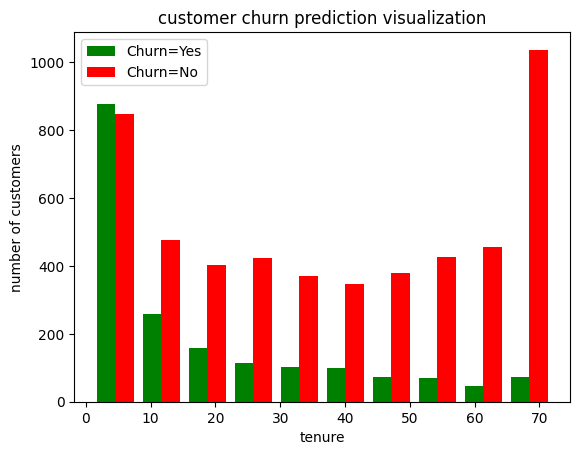

In [ ]:
#tenure it is how many loyal customer are leaving histogram is best for visutalization
tenure_chrun_no=df1[df1.Churn=='No'].tenure #tenure the loyal cusomter churn==no those are not leaving is churn=yes then they are leaving and using histogram we are ploting the graph
tenure_chrun_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("customer churn prediction visualization")
plt.hist([tenure_chrun_yes,tenure_chrun_no],color=['green','red'],label=['Churn=Yes','Churn=No']) #color indicate green =not leaving red means tenure leavig 
plt.legend() # if only mentioned label then it will not indicate which color indicate what so we need to use legend function
# this below graph indicated that 70 month tenure (loyal ppl) are leaving more and also 0-10 month tenure ppl also leaving more same plot for monthlycharges

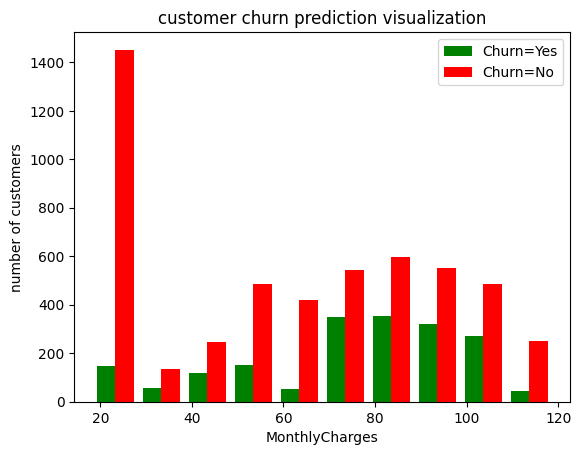

In [ ]:
#tenure it is how many loyal customer are leaving histogram is best for visutalization
tenure_chrun_no=df1[df1.Churn=='No'].MonthlyCharges #tenure the loyal cusomter churn==no those are not leaving is churn=yes then they are leaving and using histogram we are ploting the graph
tenure_chrun_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("number of customers")
plt.title("customer churn prediction visualization")
plt.hist([tenure_chrun_yes,tenure_chrun_no],color=['green','red'],label=['Churn=Yes','Churn=No']) #color indicate green =not leaving red means tenure leavig 
plt.legend() # if only mentioned label then it will not indicate which color indicate what so we need to use legend function
#when it comes to montlycharges from 60- 100 rupees all the ppl are leaving the company is in trouble👿

In [ ]:
# the time to check unique columns in the dataset there no phone service means no only so we need to put that in no like that no interenet service is there that also we will put in no 
def print_unique_col_value(df):
    for column in df1:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_value(df1)
#here clearly we can see no phone service no internet service we wil put this in no 

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#now convert all yes no to 1 and 0
yes_no_colums=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
               'StreamingMovies','PaperlessBilling','Churn'
        ]
for col in yes_no_colums:
    df1[col].replace({'Yes':1,"No":0},inplace=True)

/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/242752675.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,"No":0},inplace=True)
/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/242752675.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [ ]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')
    #replave by yes and no by 1 and 0

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/var/folders/9q/qnyb6gq555g1m3fqc5qzlws00000gn/T/ipykernel_88587/698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [ ]:
df1['gender'].unique()

array([1, 0])

In [ ]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
#for internetservice it create the 3 more colums u can see that in output


In [ ]:
df2.sample(4)
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])# helpt to make range between o to 1 for all this array set shown above

In [ ]:
df2.sample

<bound method NDFrame.sample of       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        1           0  0.000000             0   
1          0              0        0           0  0.464789             1   
2          0              0        0           0  0.014085             1   
3          0              0        0           0  0.619718             0   
4          1              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        1           1  0.323944             1   
7039       1              0        1           1  1.000000             1   
7040       1              0        1           1  0.140845             0   
7041       0              1        1           0  0.042254             1   
7042       0              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  Devi

In [ ]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:
X=df2.drop('Churn',axis='columns')
Y=df2['Churn']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)# here we are spliting our data in train and test test size =0.2 means we are doing train of model 80% and testing 20% 

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [63]:
len(X_train.columns)

26

In [68]:
import tensorflow as tf   #here to train the model we are using tensorflow so kerasSequential helps to crete the neuraon layer kera.layers.dense help to crete input layer insize we r passing the value 20 helps to know the 20 neuron layer we are creating and input_shapemeans hidden layer actication is relu for output ve are using sigmoid activation 
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),#rectified linear unit

        keras.layers.Dense(1,activation='sigmoid'),


])
#This neural network model is built using TensorFlow and Keras. 
# It starts with a Dense layer containing 20 neurons, which receives 26 input features and uses the ReLU activation function to learn patterns in the data. 
# The output layer has a single neuron with a sigmoid activation function, which produces a probability for binary classification (such as predicting whether a customer will churn or not). 
# The model is compiled using the Adam optimizer and binary cross-entropy loss, which are ideal for training binary classification models. Finally, the model is trained for 50 epochs using the training data to learn patterns and make accurate predictions.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100)
#The compile() step prepares the neural network for training by defining how it should learn. 
# In this stage, we choose an optimizer like Adam, which controls how the model updates its weights, and a loss function like binary cross-entropy, which measures how wrong the model’s predictions are.
#The loss function measures how far the model’s predictions are from the actual correct values. For every prediction, it calculates a number that represents the error. 
# In binary classification, we use binary cross-entropy, which compares the predicted probability (between 0 and 1) with the true label (0 or 1).
#  If the model predicts something close to the correct answer, the loss is small; if the prediction is far from the truth, the loss becomes large. During training, 
# the optimizer uses this loss value to adjust the model’s weights so the loss keeps getting smaller, meaning the model becomes more accurate over time.
#  We also specify metrics, such as accuracy, to track the model’s performance during training. Without compiling, the model wouldn’t know how to adjust itself or what goal to optimize for.

Epoch 1/100


/Users/atharvpatil/Documents/python projects/customer churn prediction/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.7095 - loss: 0.5498
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7883 - loss: 0.4361
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7996 - loss: 0.4199
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8036 - loss: 0.4155
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8046 - loss: 0.4128
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8039 - loss: 0.4118
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8053 - loss: 0.4111
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8068 - loss: 0.4096
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8069 - loss: 0.4092
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8078 - loss: 0.4081
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8076 - loss: 0.4078
Epoch 12/100
176/176 ━━━━━━━━━━

In [67]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7903 - loss: 0.4447


[0.4447046220302582, 0.7903340458869934]

In [74]:
yp=model.predict(X_test)
yp[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


array([[0.2304296 ],
       [0.30479383],
       [0.01210424],
       [0.763657  ],
       [0.38809395],
       [0.6283433 ],
       [0.06440713],
       [0.5286524 ],
       [0.2638228 ],
       [0.16766977]], dtype=float32)

In [73]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [71]:
#convert yp in one dimentional
y_pred=[]
for ele in yp:
    if ele >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [72]:
y_pred[:10]  #check with above yp where how it se givig round figure value some point are giving wrong bcz 80% accuracy model is

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

Text(95.72222222222221, 0.5, 'truth')

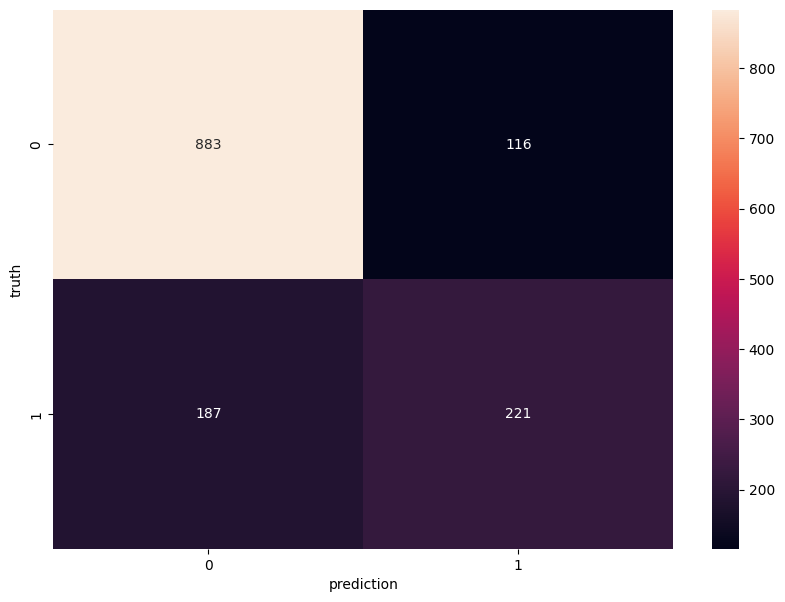

In [76]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')
#This code creates and visualizes a confusion matrix to evaluate your model’s performance. 
# First, tf.math.confusion_matrix() compares the true labels (y_test) with the model’s predicted labels (y_pred) and creates a matrix showing how many predictions were correct or incorrect. 
# Then, plt.figure(figsize=(10,7)) sets the size of the plot, and sn.heatmap(cm, annot=True, fmt='d') draws the confusion matrix as a heatmap where each cell shows the count of predictions.
#  Finally, the x-axis is labeled as “prediction” and the y-axis as “truth,” making it easy to see where the model performed well and where it made mistakes.

In [81]:
round((883+221)/(883+116+187+221),2)

0.78

In [82]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407

